In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix, roc_curve
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('heart.xlsx')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.shape

(299, 13)

In [5]:
df.DEATH_EVENT.value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

<Axes: xlabel='DEATH_EVENT', ylabel='count'>

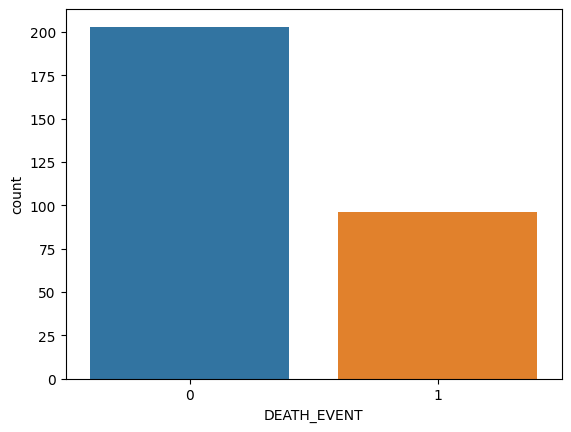

In [6]:
sns.countplot(x='DEATH_EVENT', data=df)

<Axes: xlabel='diabetes', ylabel='count'>

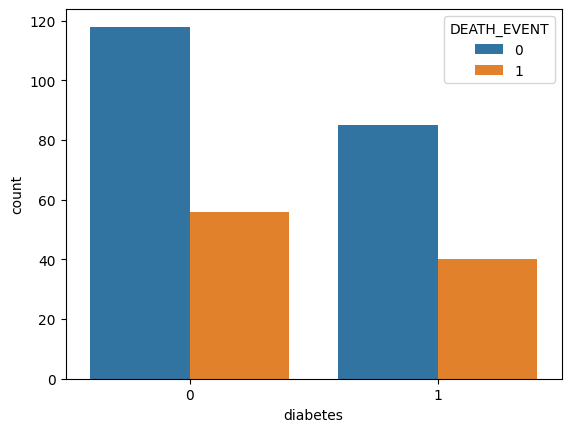

In [7]:
sns.countplot(x='diabetes',hue='DEATH_EVENT', data=df)

<Axes: xlabel='high_blood_pressure', ylabel='count'>

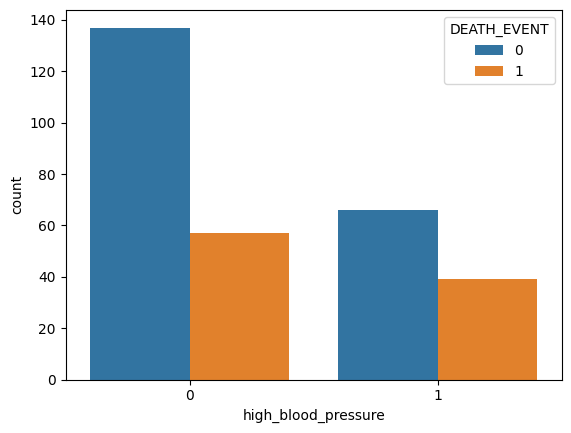

In [8]:
sns.countplot(x='high_blood_pressure', hue='DEATH_EVENT', data=df)

In [9]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


<Axes: title={'center': 'Correlation for every column'}>

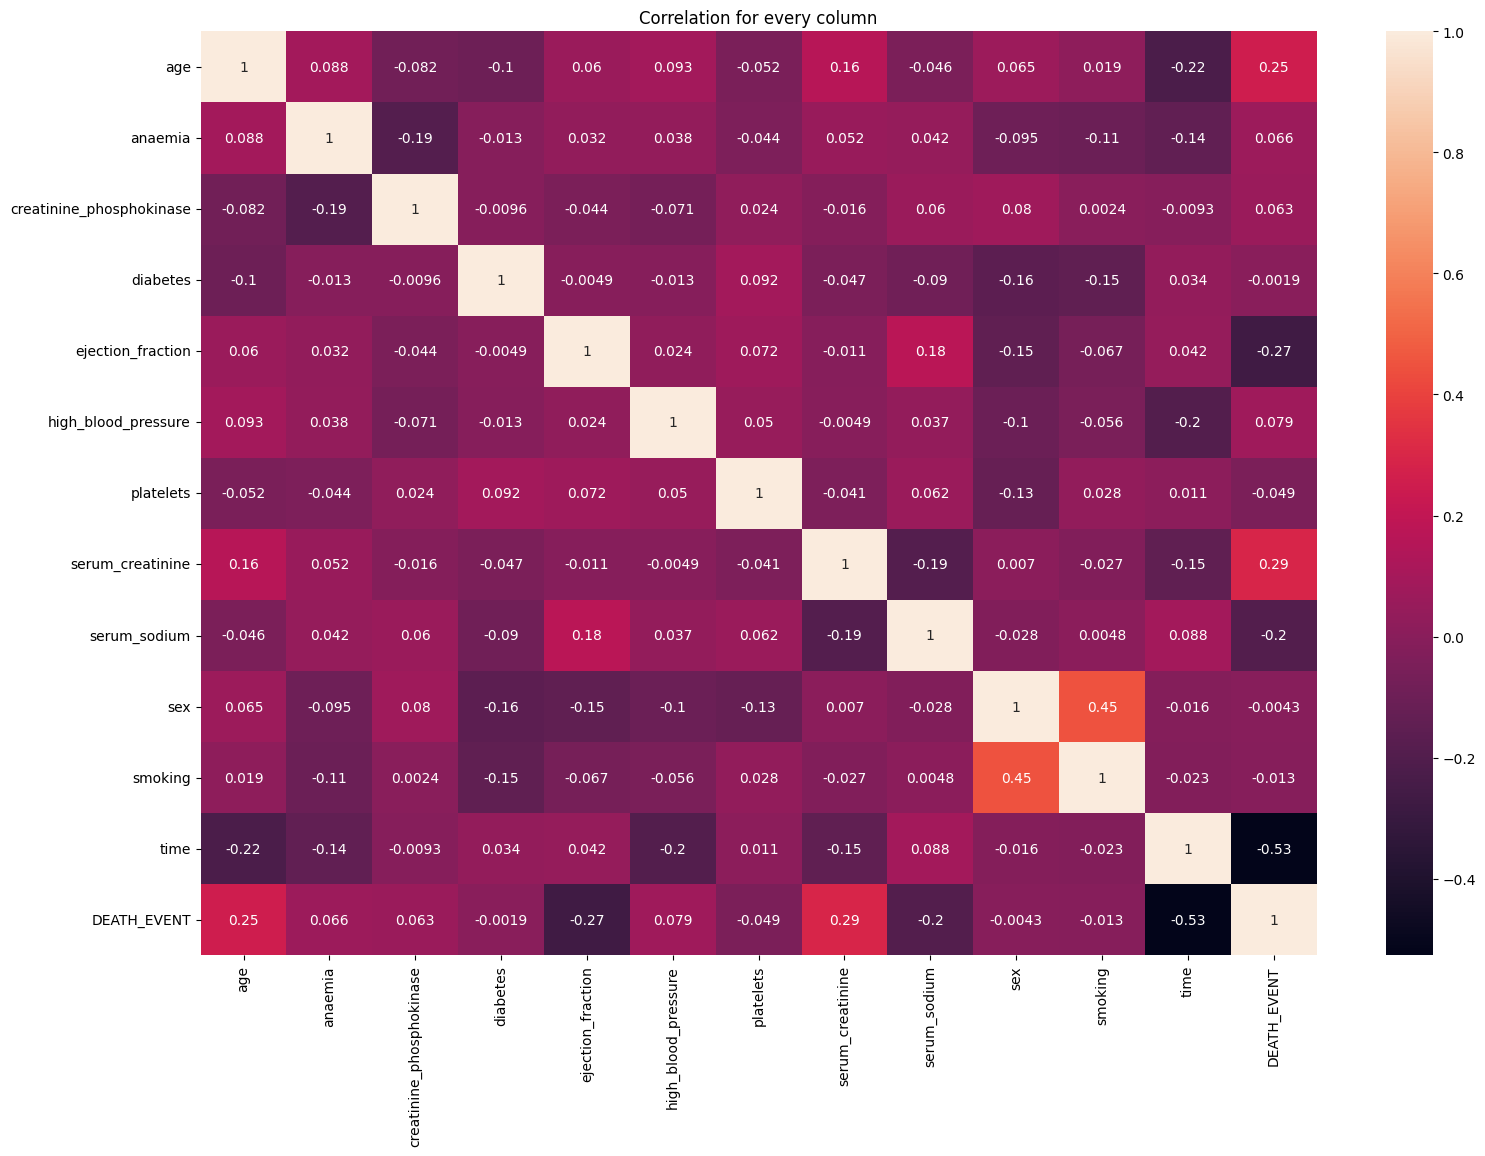

In [10]:
plt.figure(figsize=(18,12))
plt.title('Correlation for every column')
sns.heatmap(df.corr(), annot=True)

# Separete x,y

In [11]:
x = df.drop('DEATH_EVENT', axis=1)
y=df[['DEATH_EVENT']]

In [12]:
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [13]:
y.head(15)

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


# Data Train

In [14]:
xtrain,xtest,ytrain,ytest = tts(x,y,test_size=0.3,random_state=42)

In [15]:
xtrain.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
224,58.0,0,582,1,25,0,504000.0,1.0,138,1,0,205
68,70.0,0,161,0,25,0,244000.0,1.2,142,0,0,66
222,42.0,1,86,0,35,0,365000.0,1.1,139,1,1,201
37,82.0,1,855,1,50,1,321000.0,1.0,145,0,0,30
16,87.0,1,149,0,38,0,262000.0,0.9,140,1,0,14


In [16]:
xtrain.shape

(209, 12)

In [17]:
xtest.shape

(90, 12)

In [18]:
dt = DecisionTreeClassifier()

In [19]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [20]:
#plt.figure(figsize=(20,20))
#tree.plot_tree(dt, filled=True, rounded=True,feature_names=x.columns)
#plt.savefig('tree.png',dpi=1200)

In [21]:
pred = dt.predict(xtest)

In [22]:
pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1], dtype=int64)

In [23]:
np.array(ytest)

array([[0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
    

# Confussion Matrix

In [24]:
classification_report(ytest,pred)

'              precision    recall  f1-score   support\n\n           0       0.67      0.77      0.72        53\n           1       0.59      0.46      0.52        37\n\n    accuracy                           0.64        90\n   macro avg       0.63      0.62      0.62        90\nweighted avg       0.64      0.64      0.64        90\n'

In [25]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72        53
           1       0.59      0.46      0.52        37

    accuracy                           0.64        90
   macro avg       0.63      0.62      0.62        90
weighted avg       0.64      0.64      0.64        90



In [26]:
cm = confusion_matrix(ytest,pred)

In [27]:
cm

array([[41, 12],
       [20, 17]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

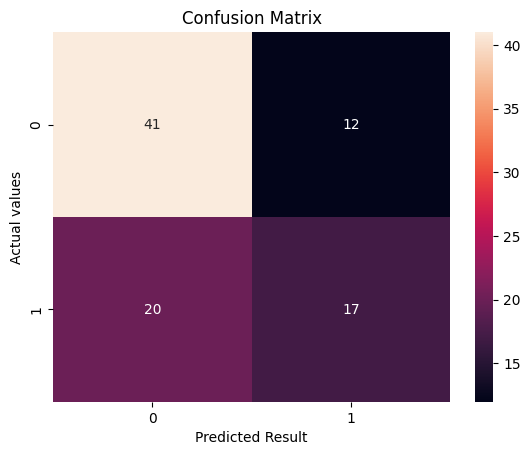

In [28]:
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Result')
plt.ylabel('Actual values')
plt.title('Confusion Matrix')

In [29]:
tp,fn,fp,tn = confusion_matrix(ytest,pred).reshape(-1)

In [30]:
tp #True Positive

41

In [31]:
fn #false Negative

12

In [32]:
fp #False positive

20

In [33]:
tn #True Negative

17

In [34]:
accuracy = (tp+tn)/(tp+fp+fn+tn)

In [35]:
accuracy

0.6444444444444445

In [36]:
precision = tp/(tp+fp)

In [37]:
precision #or positive predictive value(ppv)

0.6721311475409836

In [38]:
recall = tp/(tp+fn) #Or sensitivity or hit rate or True positive rate(trp) 

In [39]:
recall

0.7735849056603774

In [40]:
f1_score = 2*(precision*recall)/(precision+recall) #or harmonic mean

In [41]:
f1_score

0.719298245614035

In [42]:
fpr = fp/(fp+tn) #fpr = False positive rate or 1-specificity

In [43]:
fpr

0.5405405405405406

In [44]:
f1_measure = (precision+recall)/2

In [45]:
f1_measure

0.7228580266006805

In [46]:
specificity = tn/(tn+fp) #or selectivity or True negative rate(tnr)

In [47]:
specificity

0.4594594594594595

In [48]:
csi = tp/(tp+fn+fp) #csi= critical success index or Threar score(ts)

In [49]:
csi

0.5616438356164384

In [50]:
fdr = fp/(tp+fp) #fdr = False Discovery Rate

In [51]:
fdr

0.32786885245901637

In [52]:
!pip  install scikit-plot

In [53]:
!pip install --upgrade scikit-learn

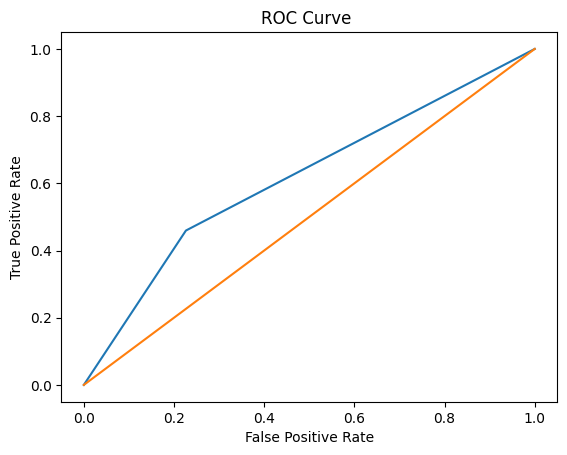

In [54]:
#ROC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Compute the predicted probabilities for the positive class
y_pred_prob = dt.predict_proba(xtest)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve ')
plt.show()

In [55]:
accuracy_score(ytest,pred)

0.6444444444444445

In [56]:
dt.score(xtest,ytest)

0.6444444444444445

# Random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [58]:
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [59]:
rf.score(xtest,ytest)

0.7555555555555555

# Random Search CV

In [60]:
from sklearn.model_selection import RandomizedSearchCV
tree = np.random.randint(15,150,30) #15 theke 150 er moddhe 30 ta tree generate korbe

In [61]:
 tree

array([ 95, 105, 113,  92, 141,  74,  20,  25,  57, 117,  77,  26,  46,
        91,  80,  54, 131, 134,  48, 103, 104,  95,  59, 139, 140,  29,
       139,  38, 130, 148])

In [63]:
max_features = ['sqrt','log2']
max_depth = np.random.randint(2,12,50) 
criterion = ['gini','entropy']
min_samples_split = [2,3,4]

grid = {
    'n_estimators' : tree,
    'criterion' : criterion,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split
}

In [64]:
print(grid)

{'n_estimators': array([ 95, 105, 113,  92, 141,  74,  20,  25,  57, 117,  77,  26,  46,
        91,  80,  54, 131, 134,  48, 103, 104,  95,  59, 139, 140,  29,
       139,  38, 130, 148]), 'criterion': ['gini', 'entropy'], 'max_features': ['sqrt', 'log2'], 'max_depth': array([ 3, 11,  6, 10,  3,  7, 11, 11,  9, 10,  8,  8,  2, 11,  4,  8,  7,
        3,  3,  9,  2,  7,  3,  8,  8,  2,  6,  9,  5,  2, 10,  6,  5,  8,
        5,  2, 10,  5, 11, 10, 10,  2,  9,  2, 10,  9,  6,  6,  2, 10]), 'min_samples_split': [2, 3, 4]}


In [65]:
rcv = RandomizedSearchCV(rf,grid,n_iter=100,cv=3)

In [66]:
rcv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 3, 11,  6, 10,  3,  7, 11, 11,  9, 10,  8,  8,  2, 11,  4,  8,  7,
        3,  3,  9,  2,  7,  3,  8,  8,  2,  6,  9,  5,  2, 10,  6,  5,  8,
        5,  2, 10,  5, 11, 10, 10,  2,  9,  2, 10,  9,  6,  6,  2, 10]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': array([ 95, 105, 113,  92, 141,  74,  20,  25,  57, 117,  77,  26,  46,
        91,  80,  54, 131, 134,  48, 103, 104,  95,  59, 139, 140,  29,
       139,  38, 130, 148])})

In [67]:
rcv.cv_results_

{'mean_fit_time': array([0.02167153, 0.07601929, 0.05402104, 0.06709321, 0.08727622,
        0.0628984 , 0.02700663, 0.10468149, 0.03446023, 0.06935398,
        0.038402  , 0.07953294, 0.03634127, 0.01994777, 0.07249443,
        0.02300493, 0.0452915 , 0.02067653, 0.05894272, 0.10882338,
        0.11233163, 0.0440166 , 0.06009515, 0.10280983, 0.04053617,
        0.0206871 , 0.08892282, 0.10487143, 0.07170725, 0.02900712,
        0.10541844, 0.07028993, 0.08207393, 0.07807263, 0.07021077,
        0.07892489, 0.09519506, 0.04267764, 0.10536838, 0.1130081 ,
        0.02317309, 0.01881981, 0.0800058 , 0.03351029, 0.01650667,
        0.09993903, 0.06929779, 0.08280651, 0.01968845, 0.09523606,
        0.09488098, 0.11165675, 0.09808818, 0.10520824, 0.04084102,
        0.02333951, 0.08743215, 0.0742135 , 0.02000483, 0.09699694,
        0.07051849, 0.04608814, 0.07274437, 0.09953976, 0.08766524,
        0.06287106, 0.10296329, 0.07975888, 0.06037585, 0.04470285,
        0.09789745, 0.06688341,

In [68]:
tuning_result = pd.DataFrame(rcv.cv_results_)

In [69]:
tuning_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.021672,9.429093e-04,0.004001,1.123916e-07,26,2,log2,10,gini,"{'n_estimators': 26, 'min_samples_split': 2, '...",0.828571,0.914286,0.855072,0.865977,0.035832,33
1,0.076019,3.034573e-06,0.008002,4.899036e-07,103,2,sqrt,6,gini,"{'n_estimators': 103, 'min_samples_split': 2, ...",0.785714,0.914286,0.826087,0.842029,0.053686,94
2,0.054021,1.173403e-06,0.006335,4.713704e-04,74,4,log2,5,gini,"{'n_estimators': 74, 'min_samples_split': 4, '...",0.828571,0.942857,0.855072,0.875500,0.048842,14
3,0.067093,9.773540e-05,0.007004,2.081521e-06,95,4,sqrt,3,entropy,"{'n_estimators': 95, 'min_samples_split': 4, '...",0.814286,0.942857,0.840580,0.865908,0.055460,38
4,0.087276,5.213308e-04,0.009668,4.712047e-04,130,4,log2,2,gini,"{'n_estimators': 130, 'min_samples_split': 4, ...",0.814286,0.914286,0.826087,0.851553,0.044620,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.098358,1.246749e-03,0.010001,2.685665e-06,134,2,log2,5,gini,"{'n_estimators': 134, 'min_samples_split': 2, ...",0.814286,0.957143,0.840580,0.870669,0.062081,27
96,0.089733,1.008602e-03,0.009669,4.712580e-04,131,3,log2,2,entropy,"{'n_estimators': 131, 'min_samples_split': 3, ...",0.814286,0.871429,0.811594,0.832436,0.027594,97
97,0.020005,2.973602e-07,0.003334,4.712019e-04,25,3,sqrt,5,gini,"{'n_estimators': 25, 'min_samples_split': 3, '...",0.842857,0.885714,0.855072,0.861215,0.018027,51
98,0.095022,9.902430e-03,0.011335,1.699768e-03,117,4,log2,10,gini,"{'n_estimators': 117, 'min_samples_split': 4, ...",0.814286,0.942857,0.855072,0.870738,0.053645,22


In [71]:
rcv.best_score_

0.8850931677018634

In [72]:
rcv.best_params_

{'n_estimators': 103,
 'min_samples_split': 3,
 'max_features': 'log2',
 'max_depth': 3,
 'criterion': 'gini'}

In [77]:
rcv2 = rcv.best_estimator_
rcv2

RandomForestClassifier(max_depth=3, max_features='log2', min_samples_split=3,
                       n_estimators=103)

In [86]:
rcv2.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=3, max_features='log2', min_samples_split=3,
                       n_estimators=103)

In [87]:
rcv2.score(xtest,ytest)

0.7666666666666667